# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
nf = pd.read_csv("netflix_dataset.csv", index_col=0)
print(nf.shape)
nf.head(100)

(8807, 11)


type                                              title  \
show_id                                                               
s1         Movie                               Dick Johnson Is Dead   
s2       TV Show                                      Blood & Water   
s3       TV Show                                          Ganglands   
s4       TV Show                              Jailbirds New Orleans   
s5       TV Show                                       Kota Factory   
...          ...                                                ...   
s96      TV Show                                         The Circle   
s97        Movie  If I Leave Here Tomorrow: A Film About Lynyrd ...   
s98      TV Show                                         Kid Cosmic   
s99      TV Show                          Octonauts: Above & Beyond   
s100     TV Show                                       On the Verge   

                director                                               cast  \
show_id                                                                       
s1       Kirsten Johnson                                                NaN   
s2                   NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
s3       Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
s4                   NaN                                                NaN   
s5                   NaN  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
...                  ...                                                ...   
s96                  NaN                                    Michelle Buteau   
s97        Stephen Kijak  Ronnie Van Zandt, Gary Rossington, Allen Colli...   
s98                  NaN  Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...   
s99                  NaN  Antonio Aakeel, Chipo Chung, Simon Foster, Ter...   
s100                 NaN  Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...   

                               country          date_added  release_year  \
show_id                                                                    
s1                       United States  September 25, 2021          2020   
s2                        South Africa  September 24, 2021          2021   
s3                                 NaN  September 24, 2021          2021   
s4                                 NaN  September 24, 2021          2021   
s5                               India  September 24, 2021          2021   
...                                ...                 ...           ...   
s96      United States, United Kingdom   September 8, 2021          2021   
s97                      United States   September 7, 2021          2018   
s98                      United States   September 7, 2021          2021   
s99                     United Kingdom   September 7, 2021          2021   
s100             France, United States   September 7, 2021          2021   

        rating   duration                                          listed_in  \
show_id                                                                        
s1       PG-13     90 min                                      Documentaries   
s2       TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
s3       TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
s4       TV-MA   1 Season                             Docuseries, Reality TV   
s5       TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
...        ...        ...                                                ...   
s96      TV-MA  3 Seasons                                         Reality TV   
s97      TV-MA     97 min                    Documentaries, Music & Musicals   
s98      TV-Y7  2 Seasons         Kids' TV, TV Comedies, TV Sci-Fi & Fantasy   
s99       TV-Y   1 Season                         British TV Shows, Kids' TV   
s100     TV-MA   1 Season                             TV Comedies, TV Dramas   

                              

[Source](https://www.kaggle.com/shivamb/netflix-shows) of dataset.

## Where to start? 
For instance: 

- 🗺️ **Explore**: How much variety exists in Netflix's offering? Base this on three variables: `type`, `country`, and `listed_in`.
- 📊 **Visualize**: Build a word cloud from the movie and TV shows descriptions. Make sure to remove stop words!
- 🔎 **Analyze**: Has Netflix invested more in certain genres (see `listed_in`) in recent years? What about certain age groups (see `ratings`)?

# Data Exploration 

## Understanding dataset 

Basic exploration

In [3]:
nf.size

96877

In [4]:
nf.shape

(8807, 11)

In [5]:
nf.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [7]:
nf.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [8]:
nf.describe(include="all")

type                 title       director                cast  \
count    8807                  8807           6173                7982   
unique      2                  8807           4528                7692   
top     Movie  Dick Johnson Is Dead  Rajiv Chilaka  David Attenborough   
freq     6131                     1             19                  19   
mean      NaN                   NaN            NaN                 NaN   
std       NaN                   NaN            NaN                 NaN   
min       NaN                   NaN            NaN                 NaN   
25%       NaN                   NaN            NaN                 NaN   
50%       NaN                   NaN            NaN                 NaN   
75%       NaN                   NaN            NaN                 NaN   
max       NaN                   NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            748             1767           NaN     17       220   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2818              109           NaN   3207      1793   
mean              NaN              NaN   2014.180198    NaN       NaN   
std               NaN              NaN      8.819312    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2019.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [9]:
nf.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Data Cleaning

- Data integrity issues
- Filling missing values 

In [10]:
missing_data = nf.isnull().sum()
missing_data

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# % missing values 
percent_missing_Data = ((nf.isnull().sum())/len(nf))*100
percent_missing_Data

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
missing_nf= pd.DataFrame({'Variable': percent_missing_Data.index, 'Missing_Percentage': percent_missing_Data.values})

# Sort the DataFrame by missing values percentage
missing_nf = missing_nf.sort_values(by='Missing_Percentage', ascending=True)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=missing_nf['Missing_Percentage'],  # x values
    y=missing_nf['Variable'],  # y values (labels)
    orientation='h',  # horizontal orientation
    marker=dict(color='skyblue'),  # color
))

fig.update_layout(
    title='Percentage of Missing Values per Variable',
    xaxis_title='Percentage of Missing Values',
    yaxis_title='Variables'
)

fig.update_xaxes(ticktext=['{:.1f}%'.format(x*100) for x in missing_nf['Missing_Percentage']])

fig.show()


**Observations:**

- "director", "country" and "cast" have missing values. 
- Let's handle missing values. 

In [13]:
missing_nf= pd.DataFrame({'Variable': percent_missing_Data.index, 'Missing_Percentage': percent_missing_Data.values})

# Sort the DataFrame by missing values percentage
missing_nf = missing_nf.sort_values(by='Missing_Percentage', ascending=False)
missing_nf

Variable  Missing_Percentage
2       director           29.908028
4        country            9.435676
3           cast            9.367549
5     date_added            0.113546
7         rating            0.045418
8       duration            0.034064
0           type            0.000000
1          title            0.000000
6   release_year            0.000000
9      listed_in            0.000000
10   description            0.000000

Starting with `date_added` columns
it's complicated to find when each of the missing moving was add in streamlit application. 
Hence, it will be delete and is a small quantitive of data to be removed. 

In [14]:
nf.isnull().sum()


type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
nf[nf['date_added'].isna()]

type                                        title director  \
show_id                                                                  
s6067    TV Show  A Young Doctor's Notebook and Other Stories      NaN   
s6175    TV Show              Anthony Bourdain: Parts Unknown      NaN   
s6796    TV Show                                      Frasier      NaN   
s6807    TV Show                                      Friends      NaN   
s6902    TV Show                              Gunslinger Girl      NaN   
s7197    TV Show                                     Kikoriki      NaN   
s7255    TV Show                          La Familia P. Luche      NaN   
s7407    TV Show                                        Maron      NaN   
s7848    TV Show                                 Red vs. Blue      NaN   
s8183    TV Show                 The Adventures of Figaro Pho      NaN   

                                                      cast         country  \
show_id                                                                      
s6067    Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
s6175                                     Anthony Bourdain   United States   
s6796    Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
s6807    Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
s6902    Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
s7197                                        Igor Dmitriev             NaN   
s7255    Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
s7407    Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
s7848    Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
s8183    Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

        date_added  release_year rating    duration  \
show_id                                               
s6067          NaN          2013  TV-MA   2 Seasons   
s6175          NaN          2018  TV-PG   5 Seasons   
s6796          NaN          2003  TV-PG  11 Seasons   
s6807          NaN          2003  TV-14  10 Seasons   
s6902          NaN          2008  TV-14   2 Seasons   
s7197          NaN          2010   TV-Y   2 Seasons   
s7255          NaN          2012  TV-14   3 Seasons   
s7407          NaN          2016  TV-MA   4 Seasons   
s7848          NaN          2015     NR  13 Seasons   
s8183          NaN          2015  TV-Y7   2 Seasons   

                                                 listed_in  \
show_id                                                      
s6067             British TV Shows, TV Comedies, TV Dramas   
s6175                                           Docuseries   
s6796                       Classic & Cult TV, TV Comedies   
s6807                       Classic & Cult TV, TV Comedies   
s6902                         Anime Series, Crime TV Shows   
s7197                                             Kids' TV   
s7255    International TV Shows, Spanish-Language TV Sh...   
s7407                                          TV Comedies   
s7848    TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
s8183                                Kids' TV, TV Comedies   

                                               description  
show_id                                                     
s6067    Set during the Russian Revolution, this comic ...  
s6175    This CNN original series has chef Anthony Bour...  
s6796    Frasier Crane is a snooty but lovable Seattle ...  
s6807    This hit sitcom follows the merry misadventure...  
s6902    On the surface, the Social Welfare Agency appe...  
s7197    A wacky rabbit and his gang of animal pals hav...  
s7255    This irreverent sitcom featues Ludovico, Feder...  
s7407    Marc Maron stars as Marc Maron, who interviews...  
s7848    This parody of first-person shooter games, mil...  
s8183    Imagine your worst fears, then multiply them: ...

It is hard to determine when it was released because it depends on which country was released. Therefore, there are only 10 rows of missing values which will be deleted. 

In [16]:
nf2=nf.dropna(subset='date_added', how="any")
nf2['date_added'].isnull().sum()

0

Let's work with `rating` missing values

In [17]:
nf2.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

- Aparently, `rating` and `duration` values are exchanged. Hence, duration will fill out with this information.
- rating will be filled out with its proper information based on internet findings.

In [18]:
nf2[nf2.rating.isna()]

type                                              title  \
show_id                                                               
s5990      Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
s6828    TV Show                  Gargantia on the Verdurous Planet   
s7313    TV Show                                       Little Lunch   
s7538      Movie                               My Honor Was Loyalty   

                director                                               cast  \
show_id                                                                       
s5990                NaN                        Oprah Winfrey, Ava DuVernay   
s6828                NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
s7313                NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
s7538    Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

           country        date_added  release_year rating  duration  \
show_id                                                               
s5990          NaN  January 26, 2017          2017    NaN    37 min   
s6828        Japan  December 1, 2016          2013    NaN  1 Season   
s7313    Australia  February 1, 2018          2015    NaN  1 Season   
s7538        Italy     March 1, 2017          2015    NaN   115 min   

                                    listed_in  \
show_id                                         
s5990                                  Movies   
s6828    Anime Series, International TV Shows   
s7313                   Kids' TV, TV Comedies   
s7538                                  Dramas   

                                               description  
show_id                                                     
s5990    Oprah Winfrey sits down with director Ava DuVe...  
s6828    After falling through a wormhole, a space-dwel...  
s7313    Adopting a child's perspective, this show take...  
s7538    Amid the chaos and horror of World War II, a c...

Let's find rating missing values and find the correct information on internet for the exchanged column.

In [19]:
#Misisng values 
rating_replacement = {
    's5990' : 'PG-13',
    's6828': 'TV-14',
    's7313' : 'PG',
    's7538' : 'NC-17'}

rating_replacement = pd.Series(rating_replacement)
nf2['rating'] = nf2['rating'].fillna(rating_replacement)

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\2250750573.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
nf2.rating.isna().sum()

0

In [21]:
nf2[nf2.duration.isna()]

type                                 title    director        cast  \
show_id                                                                        
s5542    Movie                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
s5795    Movie                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
s5814    Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

               country          date_added  release_year  rating duration  \
show_id                                                                     
s5542    United States       April 4, 2017          2017  74 min      NaN   
s5795    United States  September 16, 2016          2010  84 min      NaN   
s5814    United States     August 15, 2016          2015  66 min      NaN   

        listed_in                                        description  
show_id                                                               
s5542      Movies  Louis C.K. muses on religion, eternal love, gi...  
s5795      Movies  Emmy-winning comedy writer Louis C.K. brings h...  
s5814      Movies  The comic puts his trademark hilarious/thought...

In [22]:
nf2.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [23]:
nf2['rating'] = nf2['rating'].replace(['74 min', '84 min', '66 min'], ['TV-MA', 'TV-MA','TV-MA'])
nf2.rating.unique()

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\982358018.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:


#Let's add the proper information in duration
duration_fillout={'s5542':'74 min',
                   's5795':'84 min', 
                   's5814':'66 min'}

duration_fillout = pd.Series(duration_fillout)
nf2['duration'] = nf2['duration'].fillna(duration_fillout)

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\2044420695.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
nf2.isnull().sum()

type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

- `director`, `cast` and `country` will be filled with "Director Unavailable", "Country Unavailable", and ""Cast Unavailable".
- `date_added` will be transform to the proper datatype. 

In [26]:
nan_directors=nf2['director'].isnull()
nf2.loc[nan_directors,'director']="Director Unavailable"
nan_countries=nf2['country'].isnull()
nf2.loc[nan_countries,'country']="Country Unavailable"
nan_cast=nf2['cast'].isnull()
nf2.loc[nan_cast,'cast']="Cast Unavailable"

In [27]:
pd.to_datetime(nf2.date_added)

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [28]:
nf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8797 non-null   object
 1   title         8797 non-null   object
 2   director      8797 non-null   object
 3   cast          8797 non-null   object
 4   country       8797 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8797 non-null   int64 
 7   rating        8797 non-null   object
 8   duration      8797 non-null   object
 9   listed_in     8797 non-null   object
 10  description   8797 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [29]:
nf2.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Explore: How much variety exists in Netflix's offering? 

How much variety exists in Netflix's offering? 

Base this on three variables: type, country, and listed_in.

### Type column

In [30]:
nf2.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [31]:
labels = ['Movie','TV Show'] 
values = nf2['type'].value_counts().sort_values()

fig = go.Figure(data=go.Pie(labels=labels, values=values, hole=.3, 
                           marker=dict(colors=['cyan', 'royalblue'])))
fig.update_layout(title_text='Type of Netflix Content', uniformtext_minsize=12, uniformtext_mode='hide', 
                 title_x=0.5, title_y=0.95)
fig.show()

### Country column

Let's find out the top ten countries with highest number of movies & TV shows.

In [32]:
country_count = nf2['country'].value_counts()[:20]
country_count

United States                    2812
India                             972
Country Unavailable               830
United Kingdom                    418
Japan                             244
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          86
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Name: country, dtype: int64

In [33]:
fig = go.Figure(data=go.Bar( x=country_count, y=country_count.index, orientation='h'))

fig.update_layout(title_text='Top 10 countries with highest # of movies & TV hows',
    xaxis_title='Count',
    yaxis_title='Country', title_x=0.5, title_y=0.95)

fig.update_yaxes(categoryorder='total ascending')

fig.show()

In [34]:
grouped_df = nf2.groupby(['country', 'type']).size().reset_index(name='count')

grouped_df_sorted = grouped_df.sort_values(by='count', ascending=False)
grouped_df_sorted.head(3)

country     type  count
687  United States    Movie   2058
286          India    Movie    893
688  United States  TV Show    754

In [35]:
# Pivot the DataFrame to create separate columns for each type
pivot_df = grouped_df.pivot(index='country', columns='type', values='count')
pivot_df_sorted = pivot_df.sort_values(by='TV Show', ascending=False)[:12]
pivot_df_sorted 

type                  Movie  TV Show
country                             
United States        2058.0    754.0
Country Unavailable   440.0    390.0
United Kingdom        206.0    212.0
Japan                  76.0    168.0
South Korea            41.0    158.0
India                 893.0     79.0
Taiwan                 13.0     68.0
Canada                122.0     59.0
France                 75.0     49.0
Spain                  97.0     48.0
Australia              39.0     47.0
Mexico                 70.0     40.0

In [36]:
# Plot the stacked bar chart
fig = px.bar(pivot_df_sorted , y=sorted(pivot_df_sorted.index), x=['Movie', 'TV Show'])
fig.update_layout(title_text='Count of Each Type by Country', title_x=0.5, title_y=0.95)
fig.show()

In [37]:
# Plot the stacked bar chart
fig = px.bar(pivot_df_sorted , y=pivot_df_sorted.index, x=['TV Show'])
fig.update_layout(title_text='Count of Each Type by Country', title_x=0.5, title_y=0.95)
fig.show()

In [38]:
# Plot the stacked bar chart
pivot_df_sorted = pivot_df.sort_values(by='Movie', ascending=False)[:12]
fig = px.bar(pivot_df_sorted, y=pivot_df_sorted.index, x=['Movie'])
fig.update_layout(title_text='Count of Each Type by Country', title_x=0.5, title_y=0.95)
fig.show()

### listed_in column

In [39]:
nf2.listed_in.nunique()

513

In [40]:
listed_count = nf2['listed_in'].value_counts()[:15]
listed_count 

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Comedies, International Movies, Romantic Movies     152
Dramas                                              138
Dramas, International Movies, Thrillers             134
Action & Adventure, Dramas, International Movies    132
Name: listed_in, dtype: int64

In [41]:
fig = go.Figure(data=go.Bar( x=listed_count, y=listed_count.index, orientation='h'))

fig.update_layout(title_text='Top 15 genre TV show & Movies',
    xaxis_title='Count',
    yaxis_title='Genre', title_x=0.5, title_y=0.95)

fig.update_yaxes(categoryorder='total ascending')

fig.show()

In [42]:
pivot_df = nf2.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Pivot the DataFrame again to create separate rows for each country
pivot_df_2 = pivot_df.pivot(index='country', columns='listed_in', values='count')
pivot_df_2 

# Find the most popular genre in each country
popular_genre_by_country = pivot_df_2.idxmax(axis=1)
popular_genre_by_country

country
, France, Algeria                                       Dramas, Independent Movies, International Movies
, South Korea                                                          International TV Shows, TV Dramas
Argentina                                                                                Stand-Up Comedy
Argentina, Brazil, France, Poland, Germany, Denmark              Dramas, International Movies, Thrillers
Argentina, Chile                                        Dramas, Independent Movies, International Movies
                                                                             ...                        
Venezuela                                                            Documentaries, International Movies
Venezuela, Colombia                                                  Documentaries, International Movies
Vietnam                                                Action & Adventure, Comedies, International Mo...
West Germany                                   

In [43]:
pivot_df_sorted = pivot_df.sort_values(by='count', ascending=False)[:10]
pivot_df_sorted

country                                         listed_in  count
2303  United States                                     Documentaries    249
2416  United States                                   Stand-Up Comedy    209
961           India            Comedies, Dramas, International Movies    120
983           India                      Dramas, International Movies    118
982           India  Dramas, Independent Movies, International Movies    108
2198  United States                Children & Family Movies, Comedies     90
2331  United States                                            Dramas     88
2245  United States                                          Comedies     84
2194  United States                          Children & Family Movies     80
2379  United States                                          Kids' TV     77

 ## Word Cloud
 
 ### Word Cloud Movie &TV Show
 
 Visualize: Building a word cloud from the movie and TV shows descriptions. Make sure to remove stop words (ike "the", "a", "an", "in", "of", "on", "for", "and", etc.)!

In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: packaging>=20.0 in c:\users\elo y raul\anaconda3\lib\site-packages (from matplotlib->wordcloud) (21.3)



In [45]:
text = " ".join(review for review in nf2.title)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 164732 words in the combination of all review.


In [46]:
#Install these package if you get this error message: 
# ValueError: Only supported for TrueType fonts


# !pip install --upgrade pip

# !pip install --upgrade Pillow

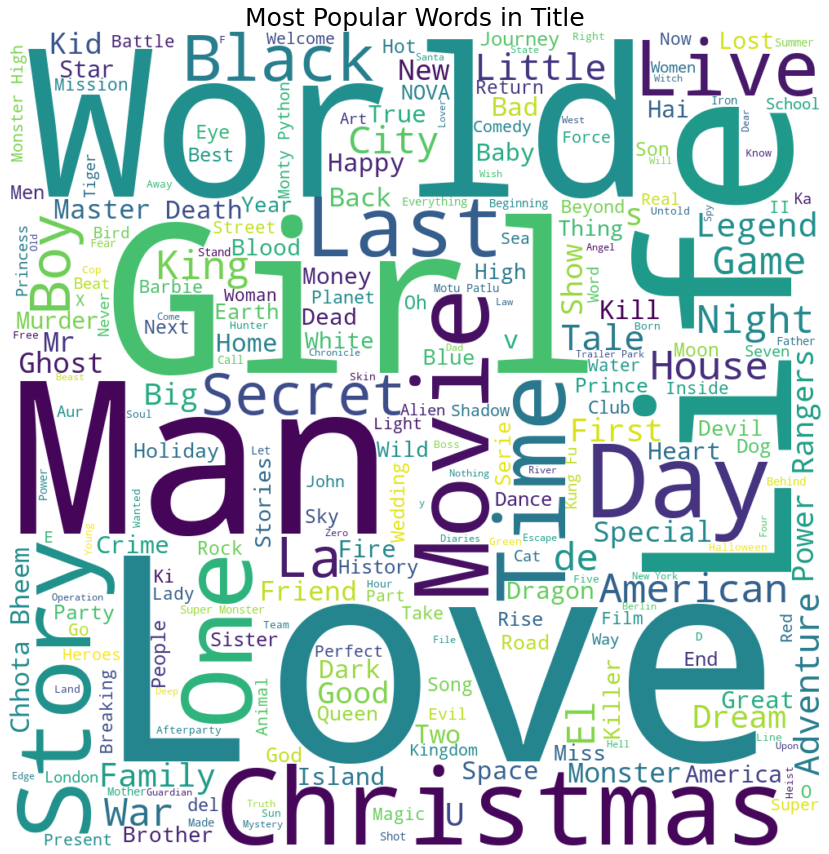

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (25, 15)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  
                      height = 1000, max_words = 250).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 25)
plt.show()

### Word Cloud: Movie 

In [115]:
nf2_movie=nf2[nf2["type"]=="Movie"]

In [119]:
text_movie = " ".join(review for review in nf2_movie.title)
print ("There are {} words in the combination of all review.".format(len(text_movie)))

There are 116666 words in the combination of all review.


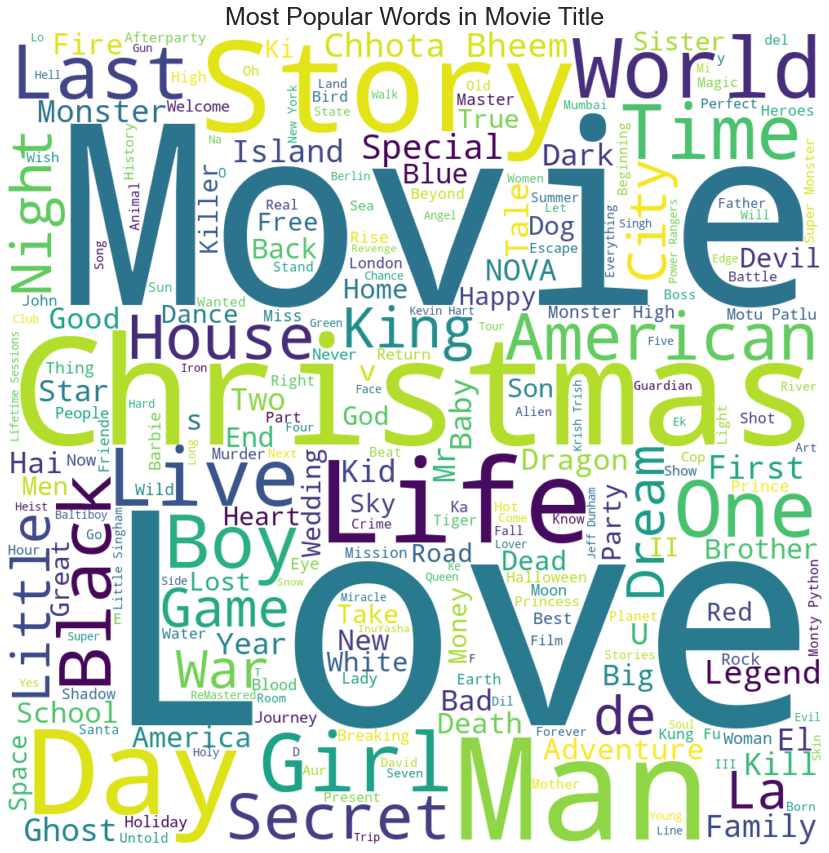

In [121]:
plt.rcParams['figure.figsize'] = (25, 15)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  
                      height = 1000, max_words = 250).generate(text_movie)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Words in Movie Title',fontsize = 25)
plt.show()

### Word Cloud: TV show

In [127]:
nf2_tv=nf2[nf2["type"]=="TV Show"]

In [128]:
text_tv= " ".join(review for review in nf2_tv.title)
print ("There are {} words in the combination of all review.".format(len(text_tv)))

There are 48065 words in the combination of all review.


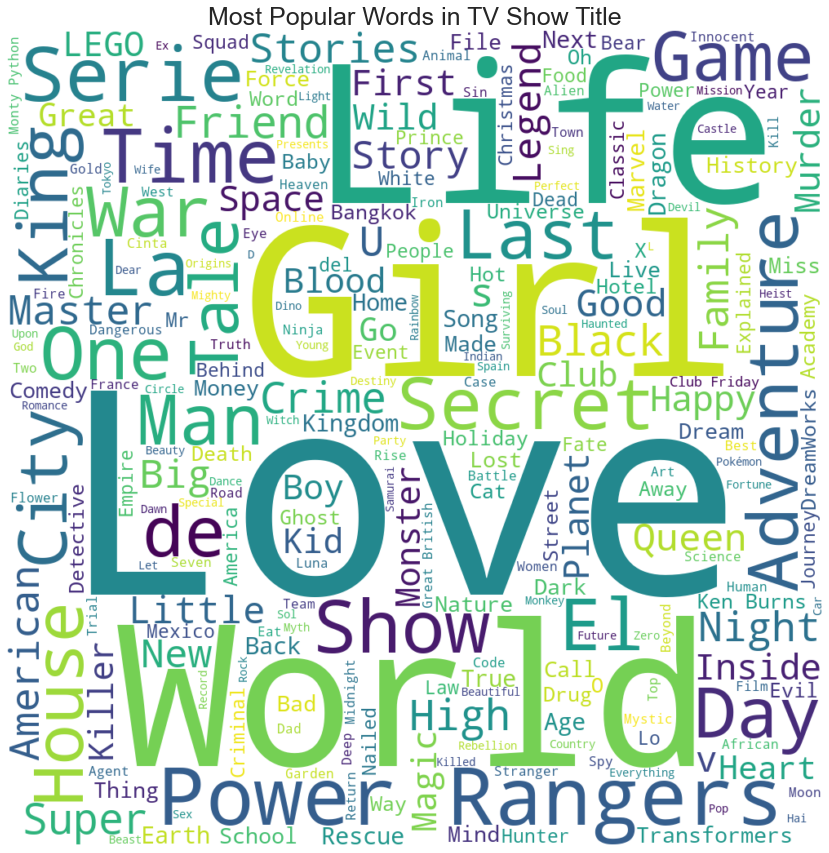

In [130]:
plt.rcParams['figure.figsize'] = (25, 15)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  
                      height = 1000, max_words = 250).generate(text_tv)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Words in TV Show Title',fontsize = 25)
plt.show()

## Answer Questions


- Has Netflix invested more in certain genres (see listed_in) in recent years?
- What about certain age groups (see ratings)?

## Release/Added year & Type

In [48]:
grouped_df = nf2.groupby(['release_year', 'type']).size().reset_index(name='count')
grouped_df.sort_values(by=['release_year', 'count'], ascending=[True, False])

release_year     type  count
0            1925  TV Show      1
1            1942    Movie      2
2            1943    Movie      3
3            1944    Movie      3
4            1945    Movie      3
..            ...      ...    ...
114          2019  TV Show    397
115          2020    Movie    517
116          2020  TV Show    436
118          2021  TV Show    315
117          2021    Movie    277

[119 rows x 3 columns]

In [49]:
nf2['year_added'] = nf2['date_added'].apply(lambda x : x.split(', ')[-1])
nf2['year_added']=pd.to_numeric(nf2.year_added)

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\2167338134.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\2167338134.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
nf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, s1 to s8807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8797 non-null   object
 1   title         8797 non-null   object
 2   director      8797 non-null   object
 3   cast          8797 non-null   object
 4   country       8797 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8797 non-null   int64 
 7   rating        8797 non-null   object
 8   duration      8797 non-null   object
 9   listed_in     8797 non-null   object
 10  description   8797 non-null   object
 11  year_added    8797 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [51]:
grouped_df2 = nf2.groupby(['year_added', 'type']).size().reset_index(name='count')
grouped_df2.sort_values(by=['year_added', 'count'], ascending=[True, False])

year_added     type  count
0         2008    Movie      1
1         2008  TV Show      1
2         2009    Movie      2
3         2010    Movie      1
4         2011    Movie     13
5         2012    Movie      3
6         2013    Movie      6
7         2013  TV Show      5
8         2014    Movie     19
9         2014  TV Show      5
10        2015    Movie     56
11        2015  TV Show     26
12        2016    Movie    253
13        2016  TV Show    176
14        2017    Movie    839
15        2017  TV Show    349
16        2018    Movie   1237
17        2018  TV Show    412
18        2019    Movie   1424
19        2019  TV Show    592
20        2020    Movie   1284
21        2020  TV Show    595
22        2021    Movie    993
23        2021  TV Show    505

In [52]:
fig = go.Figure()
######################## RELEASE YEAR ##################################

fig.add_trace(go.Scatter( 
    x=grouped_df.loc[grouped_df['type'] == 'Movie']['release_year'], 
    y=grouped_df.loc[grouped_df['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))

fig.add_trace(go.Scatter( 
    x=grouped_df.loc[grouped_df['type'] == 'TV Show']['release_year'], 
    y=grouped_df.loc[grouped_df['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='orange',
))

########################## YEAR_ADDED STREMIT PLATFORM ##################################


fig.add_trace(go.Scatter( 
    x=grouped_df2.loc[grouped_df2['type'] == 'TV Show']['year_added'], 
    y=grouped_df2.loc[grouped_df2['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='blue',
))

fig.add_trace(go.Scatter( 
    x=grouped_df2.loc[grouped_df2['type'] == 'Movie']['year_added'], 
    y=grouped_df2.loc[grouped_df2['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='purple',
))

fig.update_layout(title='Number of Releases by Year and Type', title_x=0.5, title_y=0.95)
fig.show()

In [53]:
selected_df2 = grouped_df2.loc[grouped_df2['year_added'] >= 2000]
selected_df3= grouped_df.loc[grouped_df['release_year'] >= 2000]

In [54]:
fig = go.Figure()
######################## RELEASE YEAR ##################################

fig.add_trace(go.Scatter( 
    x=selected_df3.loc[selected_df3['type'] == 'Movie']['release_year'], 
    y=selected_df3.loc[selected_df3['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))

fig.add_trace(go.Scatter( 
    x=selected_df3.loc[selected_df3['type'] == 'TV Show']['release_year'], 
    y=selected_df3.loc[selected_df3['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='orange',
))

########################## YEAR_ADDED STREMIT PLATFORM ##################################


fig.add_trace(go.Scatter( 
    x=selected_df2.loc[selected_df2['type'] == 'TV Show']['year_added'], 
    y=selected_df2.loc[selected_df2['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='blue',
))

fig.add_trace(go.Scatter( 
    x=selected_df2.loc[selected_df2['type'] == 'Movie']['year_added'], 
    y=selected_df2.loc[selected_df2['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='purple',
))

fig.update_layout(title='Number of Releases by Year and Type', title_x=0.5, title_y=0.95)
fig.show()

## Rating
- What about certain age groups (see ratings)?

In [55]:
counts = nf2['rating'].value_counts()
counts

TV-MA       3208
TV-14       2158
TV-PG        861
R            799
PG-13        491
TV-Y7        333
TV-Y         306
PG           288
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          4
UR             3
Name: rating, dtype: int64

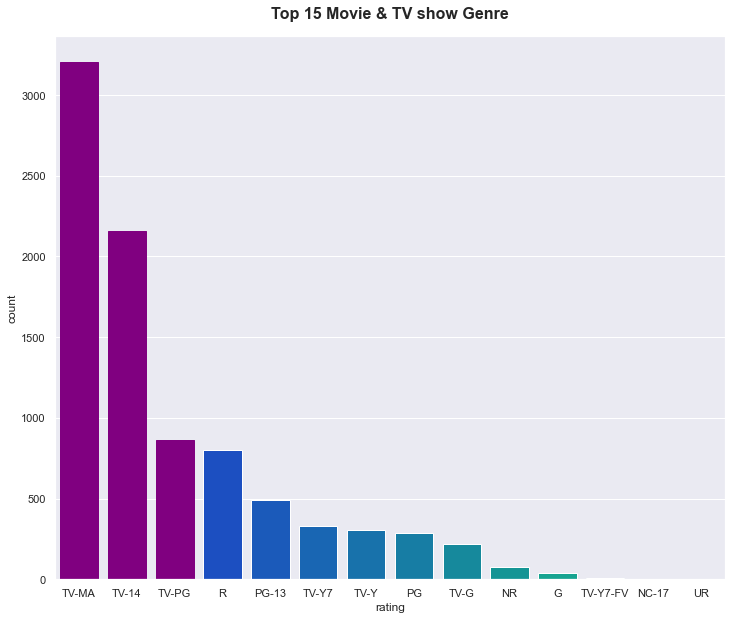

In [56]:
plt.figure(figsize=(12, 10))
sns.set(style = 'darkgrid')

# Create the countplot
ax = sns.countplot(x='rating', data=nf2, order=nf2['rating'].value_counts().index[0:15], palette='winter')

plt.title('Top 15 Movie & TV show Genre', y=1.02, fontsize=16, fontweight='bold')
# Get the top 3 bars
top_bars = ax.patches[:3]

# Highlight the top 3 bars with a different color
for bar in top_bars:
    bar.set_color('purple')

## Most popular actors and directors

### Directors

In [57]:
director_popular=nf2.copy()
director_popular= director_popular[director_popular.director!="Director Unavailable"]
counts_director = director_popular['director'].value_counts()
counts_director=counts_director[:10]
counts_director

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

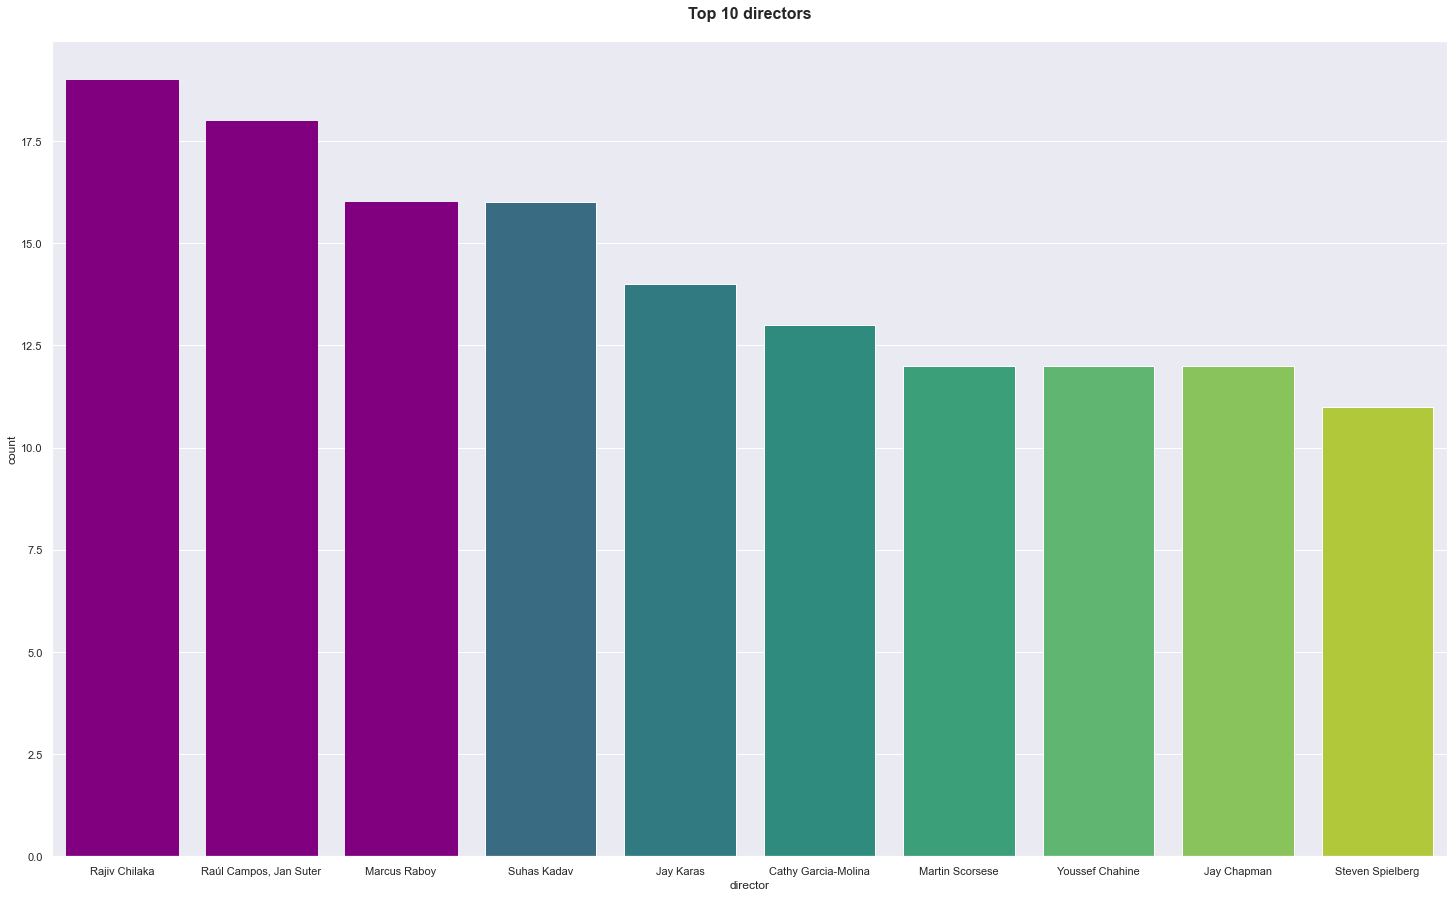

In [58]:
ax = sns.countplot(x='director', data=nf2, 
                   order=nf2[nf2['director']!='Director Unavailable']['director'].value_counts().index[0:10], 
                   palette='viridis')

plt.title('Top 10 directors', y=1.02, fontsize=16, fontweight='bold')
# Get the top 3 bars
top_bars = ax.patches[:3]

# Highlight the top 3 bars with a different color
for bar in top_bars:
    bar.set_color('purple')

# Show the plot
plt.show()

### Cast: Actors

In [60]:
cast_popular=nf2.copy()
cast_popular= cast_popular[cast_popular.cast!="Cast Unavailable"]
counts_cast = cast_popular['cast'].value_counts()
counts_cast=counts_cast[:10]
counts_cast


David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
David Spade, London Hughes, Fortune Feimster                                                                               6


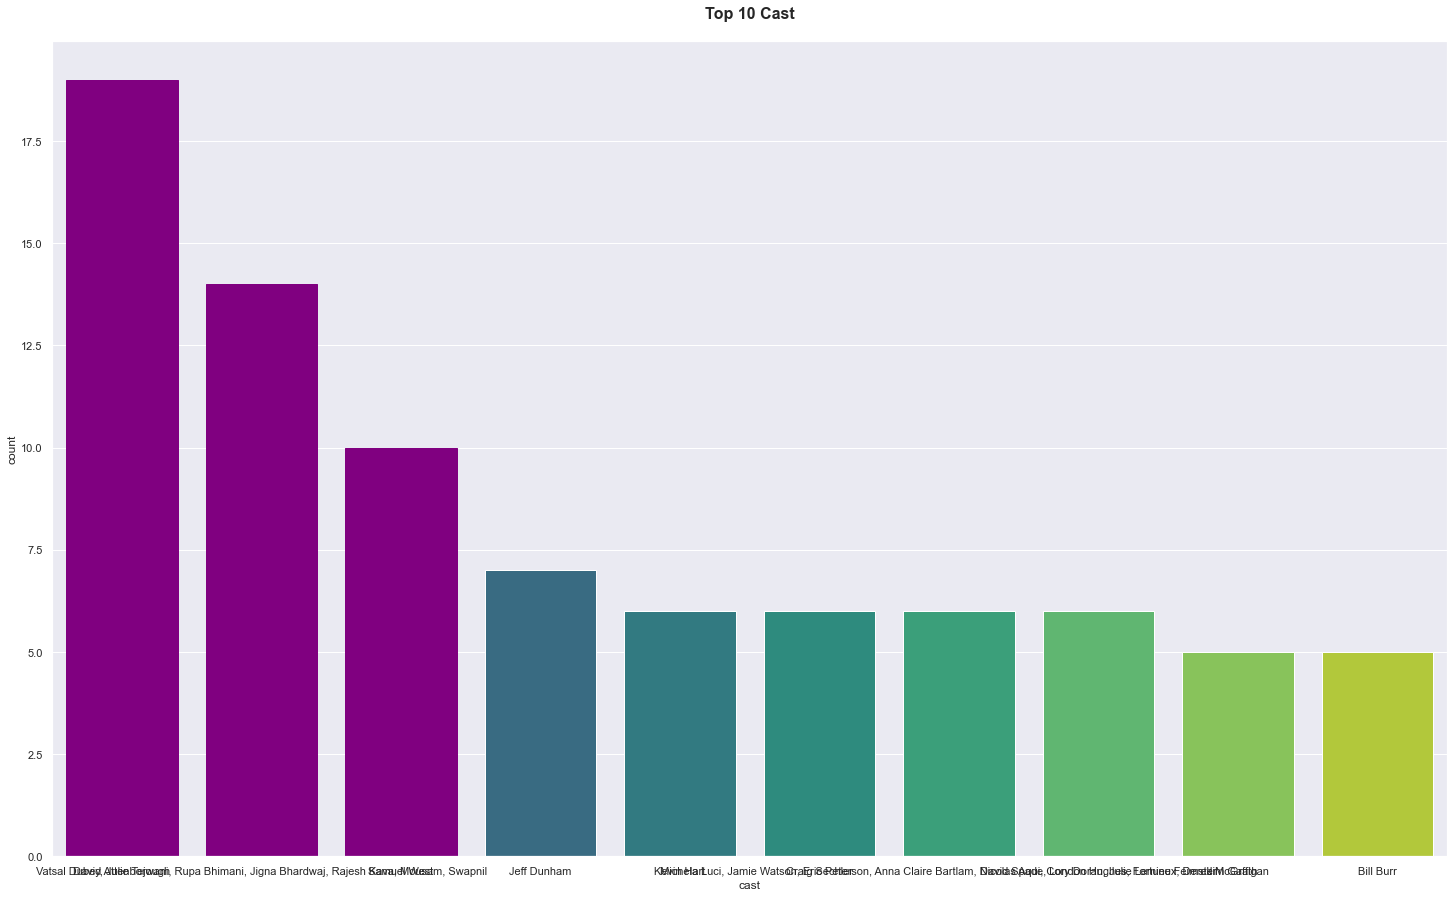

In [61]:
ax = sns.countplot(x='cast', data=nf2, 
                   order=nf2[nf2['cast']!='Cast Unavailable']['cast'].value_counts().index[0:10], 
                   palette='viridis')

plt.title('Top 10 Cast', y=1.02, fontsize=16, fontweight='bold')
# Get the top 3 bars
top_bars = ax.patches[:3]

# Highlight the top 3 bars with a different color
for bar in top_bars:
    bar.set_color('purple')

# Show the plot
plt.show()

## Duration of movies


In [62]:
def extract_minutes(x):
    match = re.search(r'(\d+) min', x)
    if match:
        return int(match.group(1))
    else:
        return None

In [63]:
nf2['minutes'] = nf2['duration'].apply(extract_minutes)

C:\Users\ELO Y RAUL\AppData\Local\Temp\ipykernel_7848\4070413731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df_minutes= nf2[nf2.minutes.notnull()]
len(df_minutes)

6131

C:\Users\ELO Y RAUL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



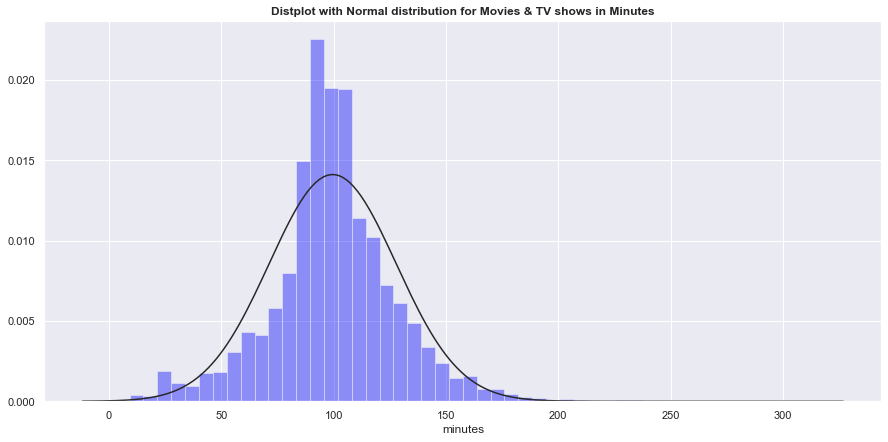

In [68]:
from scipy.stats import norm

plt.figure(figsize=(15,7))

sns.distplot(df_minutes['minutes'],fit=norm,kde=False,color=['blue'])
plt.title('Distplot with Normal distribution for Movies & TV shows in Minutes',fontweight="bold")
plt.show()

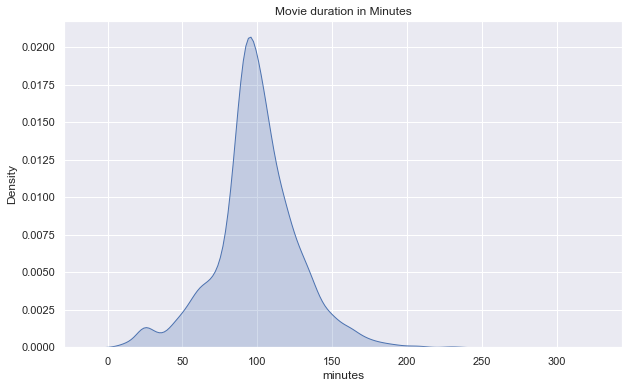

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_minutes['minutes'], shade=True)
plt.title("Movie duration in Minutes")
plt.show()

## Duration of TV shows

In [70]:
nf2_tv=nf2[nf2["type"]=="TV Show"]

In [73]:
nf2_tv.duration.unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [82]:
fig=px.histogram(x=nf2_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration-Seasons",
    xaxis_title="Duration of TV Shows", title_x=0.5, title_y=0.95)

fig.show()

## Top 10 Movie Popular by Genre

### Movie

In [97]:
nf2_movie=nf2[nf2["type"]=="Movie"]

In [108]:
movie_count= nf2_movie.listed_in.value_counts()[:15]

In [109]:
fig = go.Figure(data=go.Bar( x=movie_count, y=movie_count.index, orientation='h'))

fig.update_layout(title_text='Top 15 Movies Genre',
    xaxis_title='Count',
    yaxis_title='Genre', title_x=0.5, title_y=0.95)

fig.update_yaxes(categoryorder='total ascending')

fig.show()

### TV show

In [110]:
TV_count=nf2_tv.listed_in.value_counts()[:15]

In [111]:
fig = go.Figure(data=go.Bar( x=TV_count, y=TV_count.index, orientation='h'))

fig.update_layout(title_text='Top 15 TV show Genre',
    xaxis_title='Count',
    yaxis_title='Genre', title_x=0.5, title_y=0.95)

fig.update_yaxes(categoryorder='total ascending')

fig.show()